In [1]:
#Last run date
import datetime
print (datetime.datetime.now().strftime("%B %d, %Y %H:%M:%S"))

November 28, 2018 21:06:09


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import TensorBoard
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from itertools import permutations

Using TensorFlow backend.
C:\Users\Boris\Anaconda3_5.2.0\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.23) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)


In [4]:
#BK Import section
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion


from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import expon, reciprocal
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [5]:
df_train = pd.read_csv('uoft_ai_class_1/final_project/train.csv')

In [6]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
# get the non-numerical columns

cols = df_train.columns
num_cols = df_train._get_numeric_data().columns
list(set(cols) - set(num_cols))

['Exterior1st',
 'Neighborhood',
 'Functional',
 'BldgType',
 'LotConfig',
 'ExterCond',
 'Street',
 'BsmtFinType1',
 'PoolQC',
 'BsmtQual',
 'MiscFeature',
 'LandSlope',
 'FireplaceQu',
 'LotShape',
 'CentralAir',
 'BsmtFinType2',
 'ExterQual',
 'MasVnrType',
 'Electrical',
 'LandContour',
 'GarageCond',
 'Foundation',
 'PavedDrive',
 'GarageType',
 'BsmtExposure',
 'Heating',
 'Exterior2nd',
 'RoofMatl',
 'MSZoning',
 'Condition2',
 'Alley',
 'RoofStyle',
 'HouseStyle',
 'KitchenQual',
 'SaleType',
 'Utilities',
 'HeatingQC',
 'Condition1',
 'BsmtCond',
 'SaleCondition',
 'GarageFinish',
 'Fence',
 'GarageQual']

Correlation between columns

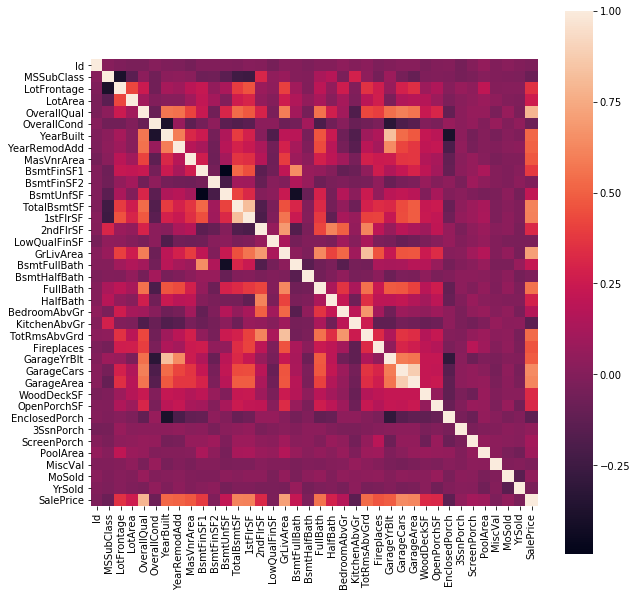

In [9]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, square=True)

Distribution of sale prices

C:\Users\Boris\Anaconda3_5.2.0\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


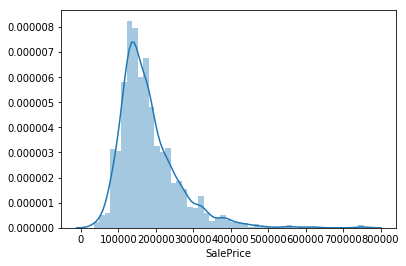

In [10]:
sns.distplot(df_train['SalePrice'])

sale price / year built chart

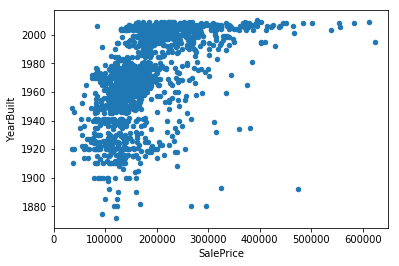

In [11]:
data = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis=1)
p = data.plot.scatter(x='SalePrice', y='YearBuilt', xlim=(0,650000))

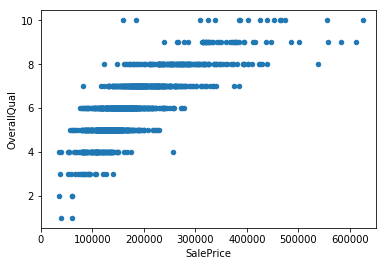

In [12]:
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
p = data.plot.scatter(x='SalePrice', y='OverallQual', xlim=(0,650000))

In [13]:
df_train = pd.read_csv('uoft_ai_class_1/final_project/train.csv')
df_test = pd.read_csv('uoft_ai_class_1/final_project/test.csv')

In [14]:
def prep_df(df):
    # Convert categories to one-hot-encodings
    df_train_one_hot = pd.get_dummies(df)
    
    # Scale the dataframe
    x = df_train_one_hot.values
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df_train_one_hot_2 = pd.DataFrame(x_scaled)
    
    return df_train_one_hot_2

In [15]:
# remove outliers
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)
# maybe we should use log for the sale price?
# df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

sale_price = df_train['SalePrice']
df_train.drop(['Id', 'SalePrice'], inplace=True, axis=1)

df_train = prep_df(df_train)
df_test = prep_df(df_test)

In [16]:
train_X, val_X, train_y, val_y = train_test_split(df_train, sale_price, random_state = 42, test_size=0.2)

In [17]:
#An alternate way to prepare data
df_train = pd.read_csv('uoft_ai_class_1/final_project/train.csv')
df_test = pd.read_csv('uoft_ai_class_1/final_project/test.csv')

sale_price=df_train.pop('SalePrice')
df_train.drop(['Id'], inplace=True, axis=1)

numerical_features_indices = np.where(df_train.dtypes != np.object)[0]
categorical_features_indices = np.where(df_train.dtypes == np.object)[0]

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('std_scaler', StandardScaler()),
        #('poly_features', PolynomialFeatures(degree=1, include_bias=False)), # Take much more time to run
    ])

cat_pipeline = Pipeline([
        ('cat_imputer', SimpleImputer(strategy='most_frequent')), 
        ('cat_Encoder', OneHotEncoder(handle_unknown='ignore')), 
    ])

full_pipeline = ColumnTransformer([
        ('num', num_pipeline, numerical_features_indices),
        ('cat1', cat_pipeline, categorical_features_indices),
    ])

df_prep = full_pipeline.fit_transform(df_train)
df_prep.shape

(1460, 288)

In [18]:
train_X, val_X, train_y, val_y = train_test_split(df_prep, sale_price, random_state = 42, test_size=0.2)

In [19]:
# Compare different models with the same input data
names = ["Linear Regression", "SVR","Ridge","Lasso","ElasticNet","SGDRegressor","KNeighbors Regressor",
         "Decision Tree Regressor", "Random Forest Regressor"]

baseline_regressors = [
    LinearRegression(), 
    SVR(kernel="linear"),
    Ridge(random_state=42),
    Lasso(random_state=42),
    ElasticNet(random_state=42),
    SGDRegressor(random_state=42),
    KNeighborsRegressor(),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42)
]

tuned_regressors = [
    LinearRegression(), 
    SVR(kernel="linear"),
    Ridge(random_state=42),
    Lasso(random_state=42),
    ElasticNet(random_state=42),
    SGDRegressor(random_state=42),
    KNeighborsRegressor(),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42)
]

In [20]:
def print_regressor_RMSE(X_tr, X_ts, y_tr, y_ts,regressors):
    for name, rgs in zip(names, regressors):
        rgs.fit(X_tr, y_tr)
        y_pred =rgs.predict(X_ts)
        rmse = np.sqrt(mean_squared_error(y_ts, y_pred))
        print('RMSE for {0} model is {1}'.format(name, rmse))

In [21]:
%%time
print_regressor_RMSE(train_X, val_X, train_y, val_y,baseline_regressors)

RMSE for Linear Regression model is 29511.181751055676
RMSE for SVR model is 82230.28697572199
RMSE for Ridge model is 30081.345746646897


C:\Users\Boris\Anaconda3_5.2.0\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Boris\Anaconda3_5.2.0\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


RMSE for Lasso model is 28166.597817133625
RMSE for ElasticNet model is 36274.987007837975
RMSE for SGDRegressor model is 32052.21241784794
RMSE for KNeighbors Regressor model is 38010.12204533282
RMSE for Decision Tree Regressor model is 45286.728826158025


C:\Users\Boris\Anaconda3_5.2.0\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE for Random Forest Regressor model is 33190.903777621184
Wall time: 3.55 s


In [22]:
#The best three model with default parameters are  Lasso (28,166), Linear (29,511) and Ridge (30,081).

In [42]:
%%time
#Hyper parameters optimization - Linear Regression
p_fit_intercept=[True, False]
p_normalize  = [True, False]
p_copy_X  = [True, False]

param_grid = [{'fit_intercept':p_fit_intercept, 'normalize':p_normalize, 'copy_X':p_copy_X}]
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=3,scoring='neg_mean_squared_error',verbose=5,n_jobs=2)
grid_search.fit(train_X, train_y)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    2.1s


Wall time: 2.87 s


[Parallel(n_jobs=2)]: Done  24 out of  24 | elapsed:    2.7s finished
C:\Users\Boris\Anaconda3_5.2.0\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [44]:
print('The best parameters for Linear Regression model are:\n{0}\n'.format(grid_search.best_params_))
final_model=grid_search.best_estimator_
y_pred = final_model.predict(val_X)
rmse= np.sqrt(mean_squared_error(val_y, y_pred))
print('The RMSE for Linear Regression model is: {0}'.format(rmse))
print('The overall improvement with tuned hyper parameters is {0:.2%}'.format((29511.18175-rmse)/29511.18175))


The best parameters for Linear Regression model are:
{'copy_X': True, 'fit_intercept': True, 'normalize': True}

The RMSE for Linear Regression model is: 28431.30038975164
The overall improvement with tuned hyper parameters is 3.66%


In [23]:
%%time
#Hyper parameters optimization - SVR
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }
rnd_search = RandomizedSearchCV(SVR(), param_distributions=param_distribs, n_iter=50, cv=5, 
                                 scoring='neg_mean_squared_error', verbose=5, n_jobs=2, random_state=42)
rnd_search.fit(train_X, train_y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    5.3s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed: 10.8min
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed: 17.4min
[Parallel(n_jobs=2)]: Done 250 out of 250 | elapsed: 23.4min finished
C:\Users\Boris\Anaconda3_5.2.0\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Wall time: 23min 22s


In [24]:
print('The best parameters for SVR  model are:\n{0}\n'.format(rnd_search.best_params_))
final_model=rnd_search.best_estimator_
y_pred = final_model.predict(val_X)
rmse= np.sqrt(mean_squared_error(val_y, y_pred))
print('The RMSE for SVR model is: {0}'.format(rmse))
print('The overall improvement with tuned hyper parameters is {0:.2%}'.format((82230.287-rmse)/82230.287))

The best parameters for SVR  model are:
{'C': 113564.03940586245, 'gamma': 0.0007790692366582295, 'kernel': 'rbf'}

The RMSE for SVR model is: 32261.253610308486
The overall improvement with tuned hyper parameters is 60.77%


In [32]:
%%time
#Hyper parameters optimization - Ridge 
param_grid = {
    'alpha': [1e-2,1e-1,1e0,1e1,1e2],
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'copy_X':[True, False],
    'solver': ['cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
}

p_alpha=[1e-2,1e-1,1e0,1e1,1e2]
p_fit_intercept  = [True, False]
p_normalize  = [True, False]
p_copy_X  = [True, False]
solver =['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']

#param_grid = [{'fit_intercept':p_fit_intercept, 'normalize':p_normalize, 'copy_X':p_copy_X}]
grid_search = GridSearchCV(Ridge(random_state=42), param_grid, cv=3,scoring='neg_mean_squared_error',verbose=5, n_jobs=2)
grid_search.fit(train_X, train_y)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    2.3s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:   11.5s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:   25.5s
[Parallel(n_jobs=2)]: Done 347 tasks      | elapsed:   49.9s
[Parallel(n_jobs=2)]: Done 600 out of 600 | elapsed:   58.8s finished
C:\Users\Boris\Anaconda3_5.2.0\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Boris\Anaconda3_5.2.0\lib\site-packages\sklearn\linear_model\ridge.py:332: UserWarning: In Ridge, only 'sag' solver can currently fit the intercept when X is sparse. Solver has been automatically changed into 'sag'.
  warnings.warn("In Ridge, only 'sag' solver can currently fit the "


Wall time: 59.1 s


In [33]:
print('The best parameters for Ridge model are:\n{0}\n'.format(grid_search.best_params_))
final_model=grid_search.best_estimator_
y_pred = final_model.predict(val_X)
rmse= np.sqrt(mean_squared_error(val_y, y_pred))
print('The RMSE for Ridge model is: {0}'.format(rmse))
print('The overall improvement with tuned hyper parameters is {0:.2%}'.format((30081.3457-rmse)/30081.3457))


The best parameters for Ridge model are:
{'alpha': 10.0, 'copy_X': True, 'fit_intercept': True, 'normalize': False, 'solver': 'cholesky'}

The RMSE for Ridge model is: 30687.04519249312
The overall improvement with tuned hyper parameters is -2.01%


Simple Neural Network with TensorBoard support

In [63]:
tbCallBack = TensorBoard(log_dir='./uoft_ai_class_1/Graph', histogram_freq=0,  
          write_graph=True, write_images=True)

In [64]:
def train_model(neurons):
    print("neurons used", neurons)
    model = Sequential()

    model.add(Dense(neurons[0], activation='relu', input_dim=287))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(neurons[1], activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(1))

    optimizer = tf.train.RMSPropOptimizer(0.01)
    model.compile (loss = 'mse', optimizer = optimizer)

    hist = model.fit(train_X, train_y, epochs=1000, batch_size=32, validation_data = (val_X, val_y), callbacks=[tbCallBack])

    return hist

a = [8,16,32,64]
perms = set(permutations(a, 2))

for p in perms:
    res = train_model(p)
    history[p] = np.average([res.history['val_loss'][-1], res.history['val_loss'][-2]])


neurons used (64, 8)
Train on 1166 samples, validate on 292 samples
Epoch 1/1000
1166/1166 [==============================] - 0s 364us/step - loss: nan - val_loss: nan
Epoch 2/1000
1166/1166 [==============================] - 0s 47us/step - loss: nan - val_loss: nan
Epoch 3/1000
1166/1166 [==============================] - 0s 48us/step - loss: nan - val_loss: nan
Epoch 4/1000
1166/1166 [==============================] - 0s 55us/step - loss: nan - val_loss: nan
Epoch 5/1000
1166/1166 [==============================] - 0s 52us/step - loss: nan - val_loss: nan
Epoch 6/1000
1166/1166 [==============================] - 0s 51us/step - loss: nan - val_loss: nan
Epoch 7/1000
1166/1166 [==============================] - 0s 51us/step - loss: nan - val_loss: nan
Epoch 8/1000
1166/1166 [==============================] - 0s 50us/step - loss: nan - val_loss: nan
Epoch 9/1000
1166/1166 [==============================] - 0s 46us/step - loss: nan - val_loss: nan
Epoch 10/1000
1166/1166 [===============

1166/1166 [==============================] - 0s 48us/step - loss: nan - val_loss: nan
Epoch 164/1000
1166/1166 [==============================] - 0s 46us/step - loss: nan - val_loss: nan
Epoch 165/1000
1166/1166 [==============================] - 0s 57us/step - loss: nan - val_loss: nan
Epoch 166/1000
1166/1166 [==============================] - 0s 57us/step - loss: nan - val_loss: nan
Epoch 167/1000
1166/1166 [==============================] - 0s 46us/step - loss: nan - val_loss: nan
Epoch 168/1000
1166/1166 [==============================] - 0s 45us/step - loss: nan - val_loss: nan
Epoch 169/1000
1166/1166 [==============================] - 0s 46us/step - loss: nan - val_loss: nan
Epoch 170/1000
1166/1166 [==============================] - 0s 52us/step - loss: nan - val_loss: nan
Epoch 171/1000
1166/1166 [==============================] - 0s 46us/step - loss: nan - val_loss: nan
Epoch 172/1000
1166/1166 [==============================] - 0s 48us/step - loss: nan - val_loss: nan
Epoch

1166/1166 [==============================] - 0s 49us/step - loss: nan - val_loss: nan
Epoch 326/1000
1166/1166 [==============================] - 0s 50us/step - loss: nan - val_loss: nan
Epoch 327/1000
1166/1166 [==============================] - 0s 48us/step - loss: nan - val_loss: nan
Epoch 328/1000
1166/1166 [==============================] - 0s 48us/step - loss: nan - val_loss: nan
Epoch 329/1000
1166/1166 [==============================] - 0s 72us/step - loss: nan - val_loss: nan
Epoch 330/1000
1166/1166 [==============================] - 0s 53us/step - loss: nan - val_loss: nan
Epoch 331/1000
1166/1166 [==============================] - 0s 64us/step - loss: nan - val_loss: nan
Epoch 332/1000
1166/1166 [==============================] - 0s 47us/step - loss: nan - val_loss: nan
Epoch 333/1000
1166/1166 [==============================] - 0s 70us/step - loss: nan - val_loss: nan
Epoch 334/1000
1166/1166 [==============================] - 0s 55us/step - loss: nan - val_loss: nan
Epoch

1166/1166 [==============================] - 0s 57us/step - loss: nan - val_loss: nan
Epoch 488/1000
1166/1166 [==============================] - 0s 48us/step - loss: nan - val_loss: nan
Epoch 489/1000
1166/1166 [==============================] - 0s 50us/step - loss: nan - val_loss: nan
Epoch 490/1000
1166/1166 [==============================] - 0s 51us/step - loss: nan - val_loss: nan
Epoch 491/1000
1166/1166 [==============================] - 0s 51us/step - loss: nan - val_loss: nan
Epoch 492/1000
1166/1166 [==============================] - 0s 48us/step - loss: nan - val_loss: nan
Epoch 493/1000
1166/1166 [==============================] - 0s 48us/step - loss: nan - val_loss: nan
Epoch 494/1000
1166/1166 [==============================] - 0s 52us/step - loss: nan - val_loss: nan
Epoch 495/1000
1166/1166 [==============================] - 0s 49us/step - loss: nan - val_loss: nan
Epoch 496/1000
1166/1166 [==============================] - 0s 47us/step - loss: nan - val_loss: nan
Epoch

1166/1166 [==============================] - 0s 52us/step - loss: nan - val_loss: nan
Epoch 650/1000
1166/1166 [==============================] - 0s 54us/step - loss: nan - val_loss: nan
Epoch 651/1000
1166/1166 [==============================] - 0s 48us/step - loss: nan - val_loss: nan
Epoch 652/1000
1166/1166 [==============================] - 0s 45us/step - loss: nan - val_loss: nan
Epoch 653/1000
1166/1166 [==============================] - 0s 52us/step - loss: nan - val_loss: nan
Epoch 654/1000
1166/1166 [==============================] - 0s 52us/step - loss: nan - val_loss: nan
Epoch 655/1000
1166/1166 [==============================] - 0s 52us/step - loss: nan - val_loss: nan
Epoch 656/1000
1166/1166 [==============================] - 0s 54us/step - loss: nan - val_loss: nan
Epoch 657/1000
1166/1166 [==============================] - 0s 56us/step - loss: nan - val_loss: nan
Epoch 658/1000
1166/1166 [==============================] - 0s 55us/step - loss: nan - val_loss: nan
Epoch

1166/1166 [==============================] - 0s 48us/step - loss: nan - val_loss: nan
Epoch 812/1000
1166/1166 [==============================] - 0s 52us/step - loss: nan - val_loss: nan
Epoch 813/1000
1166/1166 [==============================] - 0s 47us/step - loss: nan - val_loss: nan
Epoch 814/1000
1166/1166 [==============================] - 0s 47us/step - loss: nan - val_loss: nan
Epoch 815/1000
1166/1166 [==============================] - 0s 47us/step - loss: nan - val_loss: nan
Epoch 816/1000
1166/1166 [==============================] - 0s 50us/step - loss: nan - val_loss: nan
Epoch 817/1000
1166/1166 [==============================] - 0s 57us/step - loss: nan - val_loss: nan
Epoch 818/1000
1166/1166 [==============================] - 0s 47us/step - loss: nan - val_loss: nan
Epoch 819/1000
1166/1166 [==============================] - 0s 49us/step - loss: nan - val_loss: nan
Epoch 820/1000
1166/1166 [==============================] - 0s 54us/step - loss: nan - val_loss: nan
Epoch

1166/1166 [==============================] - 0s 55us/step - loss: nan - val_loss: nan
Epoch 974/1000
1166/1166 [==============================] - 0s 47us/step - loss: nan - val_loss: nan
Epoch 975/1000
1166/1166 [==============================] - 0s 46us/step - loss: nan - val_loss: nan
Epoch 976/1000
1166/1166 [==============================] - 0s 47us/step - loss: nan - val_loss: nan
Epoch 977/1000
1166/1166 [==============================] - 0s 50us/step - loss: nan - val_loss: nan
Epoch 978/1000
1166/1166 [==============================] - 0s 50us/step - loss: nan - val_loss: nan
Epoch 979/1000
1166/1166 [==============================] - 0s 52us/step - loss: nan - val_loss: nan
Epoch 980/1000
1166/1166 [==============================] - 0s 48us/step - loss: nan - val_loss: nan
Epoch 981/1000
1166/1166 [==============================] - 0s 47us/step - loss: nan - val_loss: nan
Epoch 982/1000
1166/1166 [==============================] - 0s 51us/step - loss: nan - val_loss: nan
Epoch

NameError: name 'history' is not defined

In [65]:
history

# the key is the number of neurons in the first and second layer
# the value is the average validation loss of the last two epochs
# we should use the smallest network with 8 and 16 neurons in the two layers

NameError: name 'history' is not defined

In [25]:
with open('final_proj_res_2.csv', 'w') as f:
    for k in history.keys():
        f.write(str(k))
        f.write(',')
        f.write(str(history[k]))
        f.write('\n')